在运行CellChat的基本流程之后得到了细胞间通讯网络，从这里开始，围绕这三个问题，作者给出了一系列的代码和可视化函数。带着这种自上而下，从细胞，到通路，再到基因（受配体对）的思维，我们能够更好的理解作者的分析思路和代码思维。

因此，围绕可视化，作者的思路是
（1）
细胞层面的可视化，如细胞间与细胞间互作可视化（2）；
通路层面的可视化，如A细胞与B细胞互作主要通过哪些通（3）路；
基因，也就是配受体对的可视化，如A细胞与B细胞互作主要通过哪些受配体对。

In [1]:
#remotes::install_github("sqjin/CellChat")
library(CellChat)
library(patchwork)
library(Seurat)
# library(SeuratData)
library(qs)
library(aplot)
library(ggplotify)
# AvailableData()
# InstallData("pbmc3k")

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103

aplo

In [2]:
cellchat = qread("CellCha_Res.qs")

# Part III：细胞-细胞通讯网络可视化

在推断细胞-细胞通讯网络的基础上，CellChat为进一步的数据探索、分析和可视化提供了各种功能。

它提供了多种可视化cell-cell通讯网络的方法，包括hierarchical plot, circle plot, Chord diagram, 和bubble plot.
为推测网络的高阶信息提取和可视化提供便捷。例如，它可以预测细胞亚群的主要信号输入和输出，以及这些细胞群和信号如何协同工作。
它可以利用社会网络分析、模式识别和多种学习方法相结合的综合方法对推断的细胞-细胞通讯网络进行定量表征和比较。

## Step8. 使用层次图（Hierarchical plot），圆圈图（Circle plot）或和弦图（Chord diagram）可视化每个信号通路

下面是几种可视化图形的解读和部分参数，英文更为原汁原味：

Hierarchy plot: USER should define vertex.receiver, which is a numeric vector giving the index of the cell groups as targets in the left part of hierarchy plot. This hierarchical plot consist of two components: the left portion shows autocrine and paracrine signaling to certain cell groups of interest (i.e, the defined vertex.receiver), and the right portion shows autocrine and paracrine signaling to the remaining cell groups in the dataset. Thus, hierarchy plot provides an informative and intuitive way to visualize autocrine and paracrine signaling communications between cell groups of interest. For example, when studying the cell-cell communication between fibroblasts and immune cells, USER can define vertex.receiver as all fibroblast cell groups.


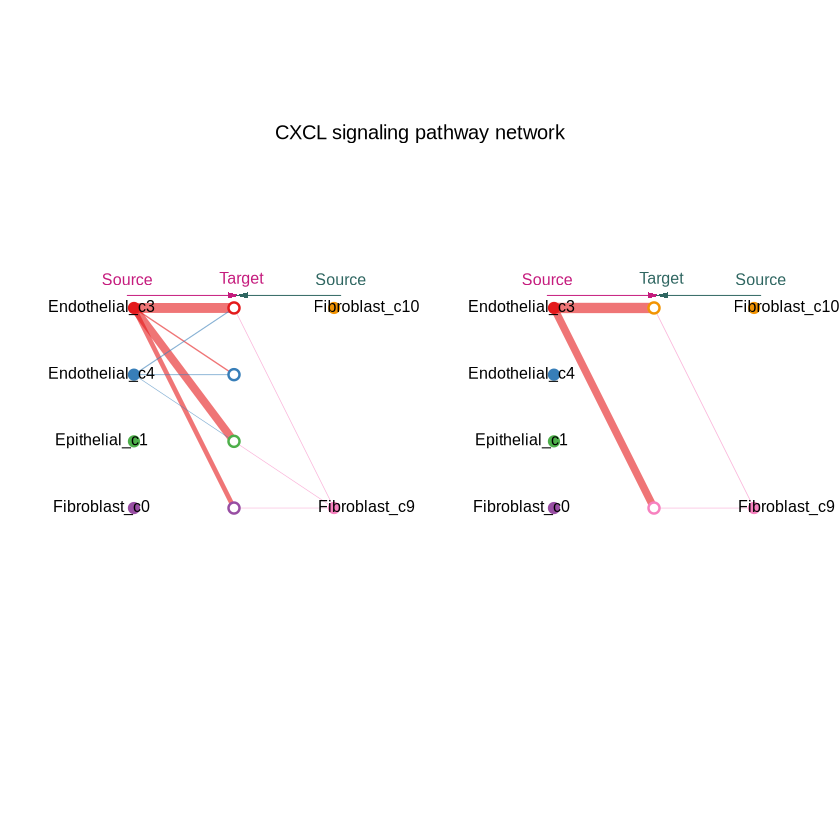

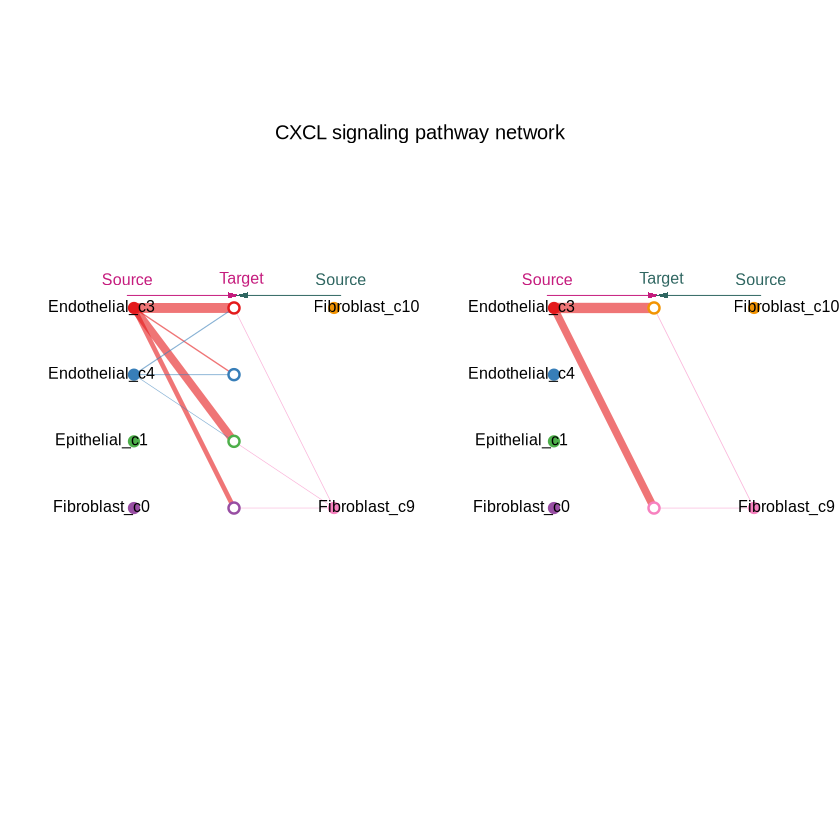

In [3]:
pathways.show <- c("CXCL") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = c(1,2,3,4) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, layout = "hierarchy")

可视化解读：层次图包含左（A，C，B）和右（A，C，B）两块内容，左边的部分显示了指定的细胞亚群的自分泌和旁分泌信号（定义为vertex.receiver参数对应的细胞亚群），如c(1,2,3,4), 分别对应上图的"Naive CD4 T"， "Memory CD4 T"， "CD14+ Mono" 和"B" ；右边显示数据集中剩余的细胞亚群（除了1,2,3,4以外的）的自分泌和旁分泌信号。

Circle plot：Visualization of cell-cell communication at different levels**: One can visualize the inferred communication network of signaling pathways using netVisual_aggregate, and visualize the inferred communication networks of individual L-R pairs associated with that signaling pathway using netVisual_individual.

这个图比较好理解，也是目前用的比较多的展现方式，例如：

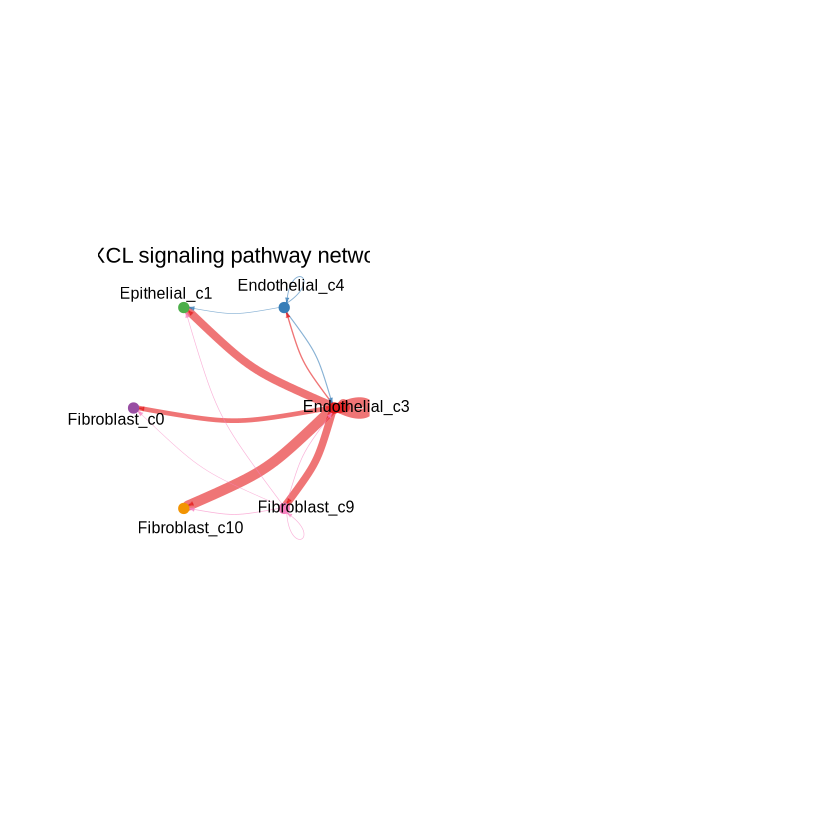

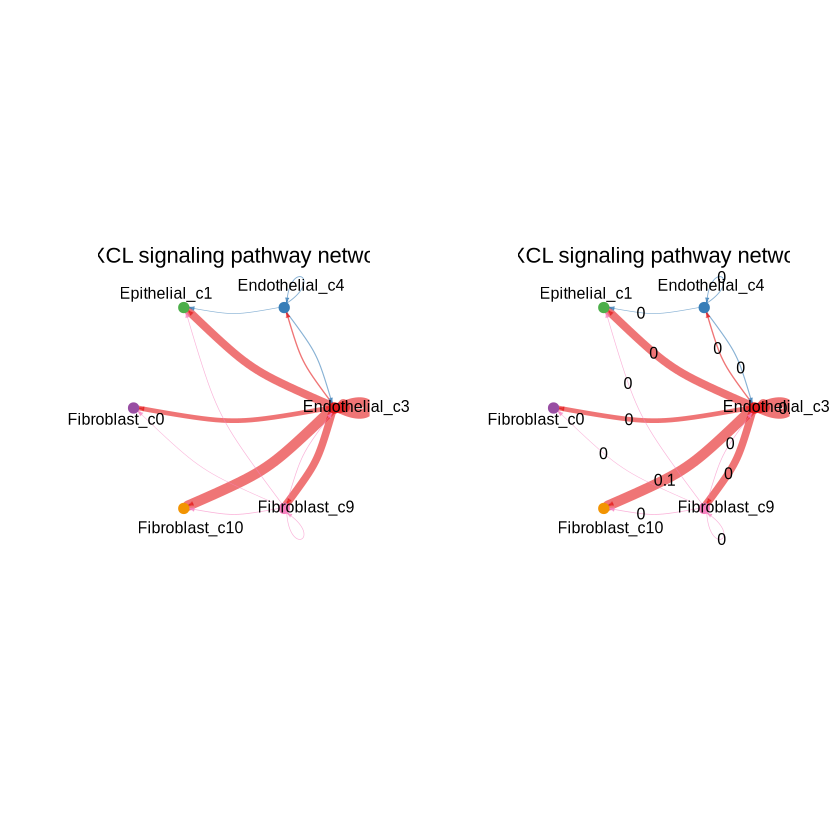

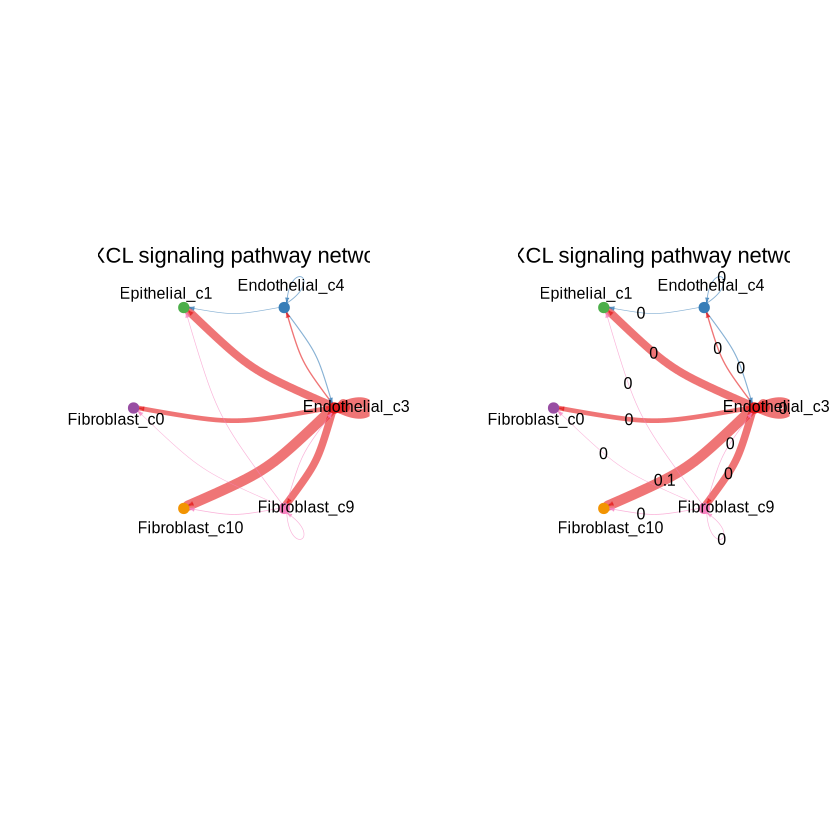

In [4]:
# Circle plot show pathway
par(mfrow=c(1,2))
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle",label.edge= T)

小技巧：用extractEnrichedLR函数提取指定pathways内的所有受配体信号值，然后用netVisual_individual可视化（设置参数pairLR.use）：

[1] "CXCL1_CXCR2"

[[1]]


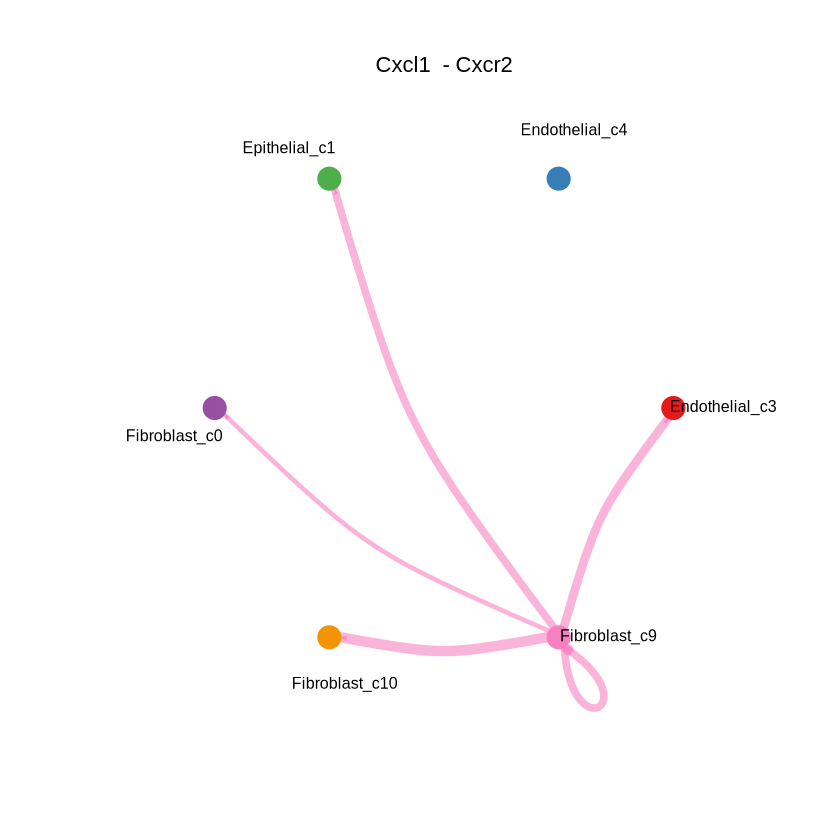

In [6]:
# Circle plot show L-R pairs
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[1,] # show one ligand-receptor pair
LR.show
#"MIF_CD74_CXCR4"
# Vis
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = "CXCL1_CXCR2", layout = "circle")

Chord diagram: CellChat provides two functions netVisual_chord_cell and netVisual_chord_gene for visualizing cell-cell communication with different purposes and different levels. netVisual_chord_cell is used for visualizing the cell-cell communication between different cell groups (where each sector in the chord diagram is a cell group), and netVisual_chord_gene is used for visualizing the cell-cell communication mediated by mutiple ligand-receptors or signaling pathways (where each sector in the chord diagram is a ligand, receptor or signaling pathway.)

CellChat的和弦图有两种展示方式：

一种是netVisual_chord_cell函数，用于可视化不同细胞亚群之间的细胞-细胞通讯（弦图中的每个扇区都是一个细胞亚群）；
而netVisual_chord_gene函数，用于显示由多个配体-受体或信号通路（弦图中的每个扇区是一个配体、受体或信号通路）介导的细胞-细胞通讯。

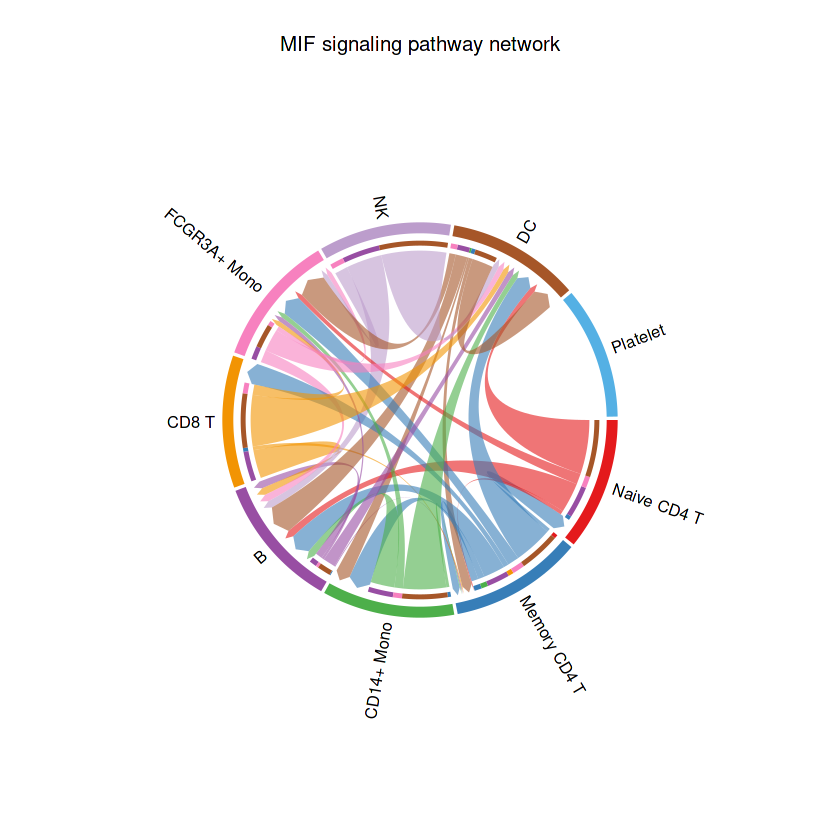

In [51]:
# par(mfrow = c(1,2), xpd=TRUE)
# Chord diagram 下面这两幅图等价
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord",title.name = "Chord diagram  1")
#netVisual_chord_cell(cellchat, signaling = pathways.show,title.name = "Chord diagram  2: show cell type")

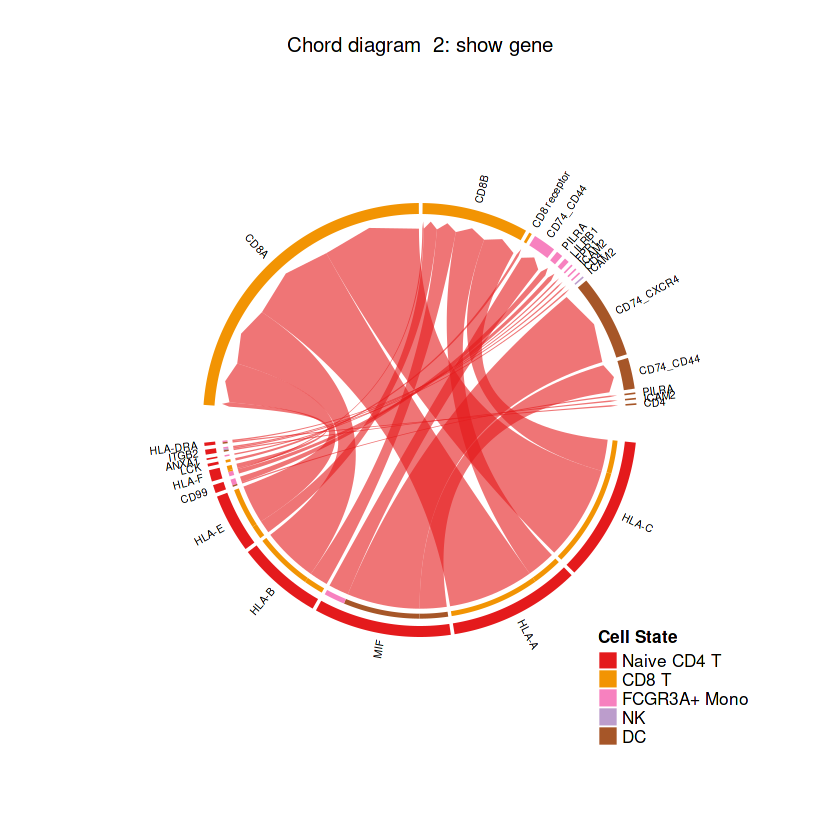

In [54]:
# Chord diagram 2 show L-R pairs 显示配受体层面的和弦图，指定slot.name为net
netVisual_chord_gene(cellchat, sources.use = 1, targets.use = c(5:8), lab.cex = 0.5,title.name = "Chord diagram  2: show gene",slot.name = "net") 

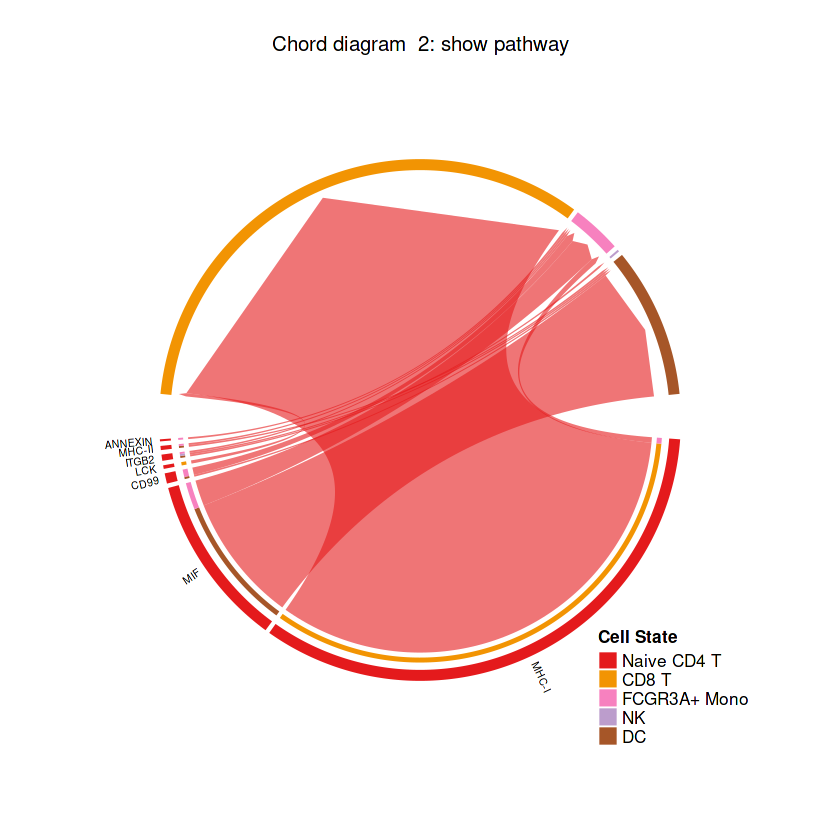

In [55]:
# Chord diagram 3 show pathway 显示通路层面的和弦图，指定slot.name为netP
netVisual_chord_gene(cellchat, sources.use = 1, targets.use = c(5:8), lab.cex = 0.5,slot.name = "netP",title.name = "Chord diagram  2: show pathway") 

如何合并细胞类型进行Chord diagram可视化？

对于和弦图，CellChat有一个独立的功能netVisual_chord_cell，通过调整圆包中的不同参数，可以灵活地可视化信号网络。例如，我们可以定义一个命名字符向量组来创建多组和弦图，例如，将cell集群分组为不同的cell类型。

In [56]:
levels(cellchat@idents)

[1] "Naive CD4 T"  "Memory CD4 T" "CD14+ Mono"   "B"            "CD8 T"       
[6] "FCGR3A+ Mono" "NK"           "DC"           "Platelet"

Plot the aggregated cell-cell communication network at the signaling pathway level



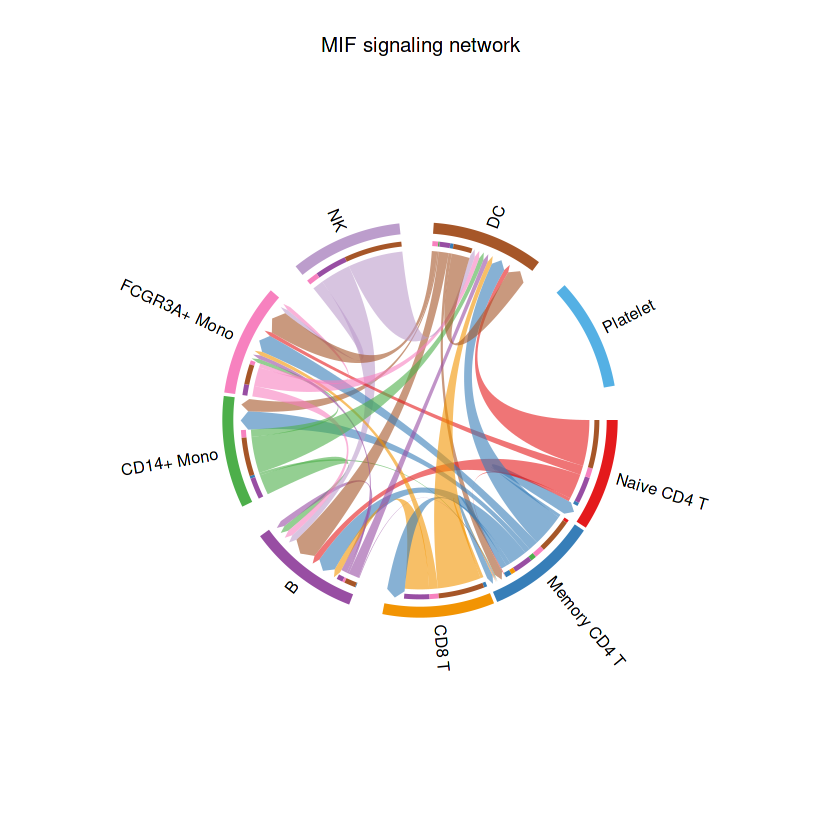

In [57]:
### 合并细胞类型
group.cellType <- c("T","T","Mono","B","T","Mono","NK","DC","Platelet")
group.cellType <- factor(group.cellType, levels = c("T", "B", "Mono", "NK","DC","Platelet"))
names(group.cellType) <- levels(cellchat@idents)

# Vis
netVisual_chord_cell(cellchat, signaling = pathways.show, group = group.cellType, title.name = paste0(pathways.show, " signaling network"))

Explnations of edge color/weight, node color/size/shape: In all visualization plots, edge colors are consistent with the sources as sender, and edge weights are proportional to the interaction strength. Thicker edge line indicates a stronger signal. In the Hierarchy plot and Circle plot, circle sizes are proportional to the number of cells in each cell group. In the hierarchy plot, solid and open circles represent source and target, respectively. In the Chord diagram, the inner thinner bar colors represent the targets that receive signal from the corresponding outer bar. The inner bar size is proportional to the signal strength received by the targets. Such inner bar is helpful for interpreting the complex chord diagram. Note that there exist some inner bars without any chord for some cell groups, please just igore it because this is an issue that has not been addressed by circlize package.

In [ ]:
Heatmap：热图说的东西其实和上面展示的是差不多的，只是换了另外一种展现形式。

Do heatmap based on a single object 




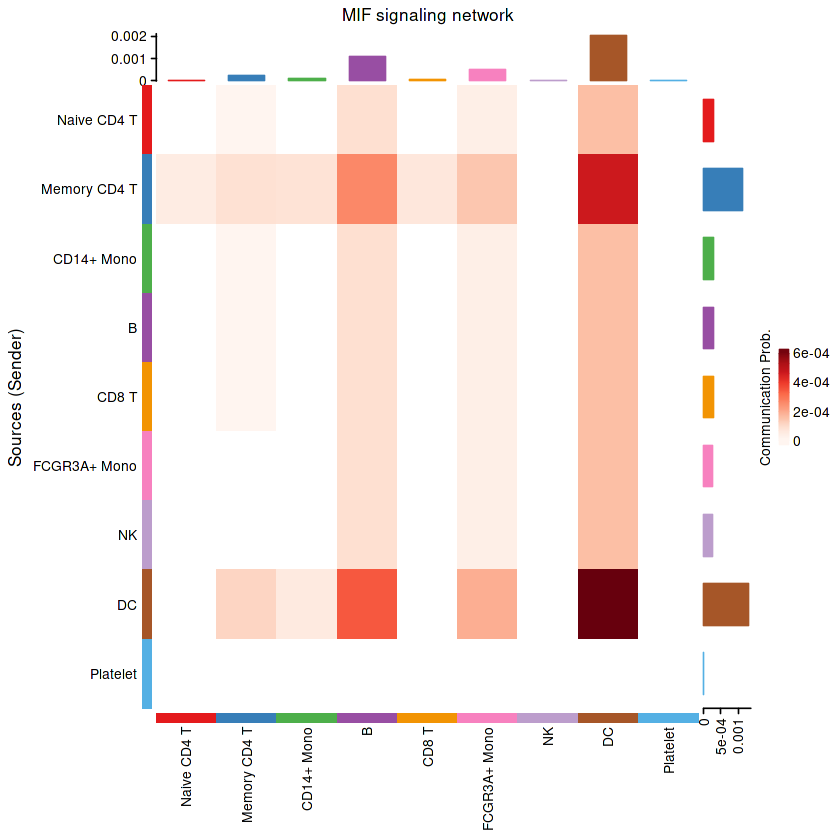

In [58]:
# Heatmap
par(mfrow=c(1,1))
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")

## Step9. 计算每个配体-受体对L-R pairs对整个信号通路的贡献，并可视化单个配体-受体对介导的细胞-细胞通信

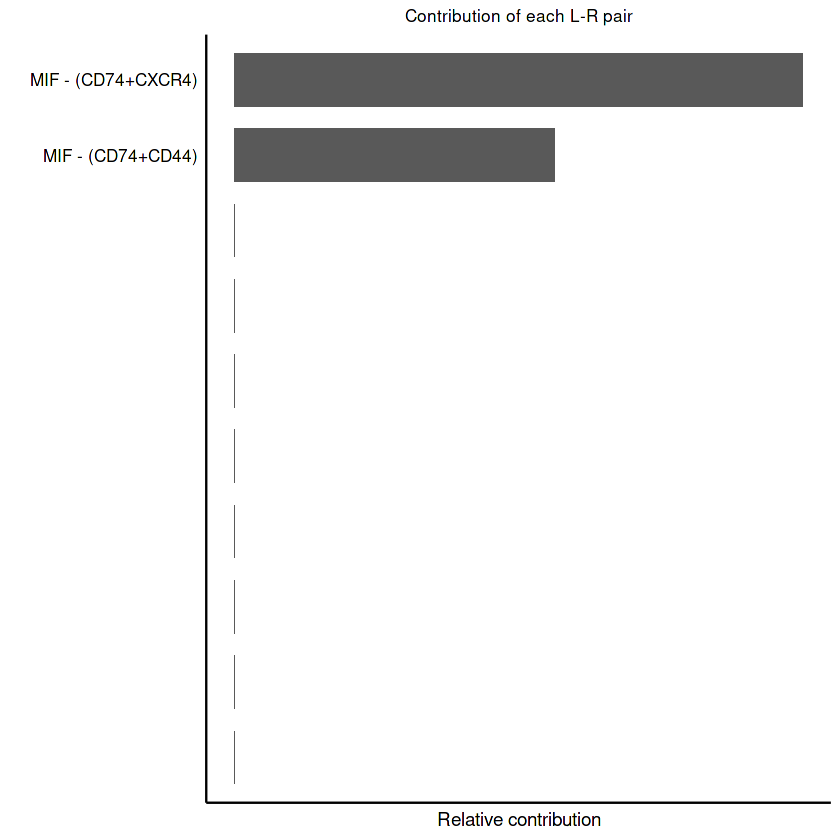

In [59]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

我们还可以可视化到单个配体-受体对介导的细胞-细胞通信。我们还可以用Circle plot show L-R pairs（见Step8），即可视化单个配体-受体对介导的细胞-细胞通信。作者提供了一个函数 extractEnrichedLR ，用于提取指定信号通路的所有L-R pairs和相关信号基因。

除了Circle plot可视化受配体对，还可以用和弦图，逻辑和可视化pathwaty是一样的，无非是多指定一个pairLR.use：

[[1]]


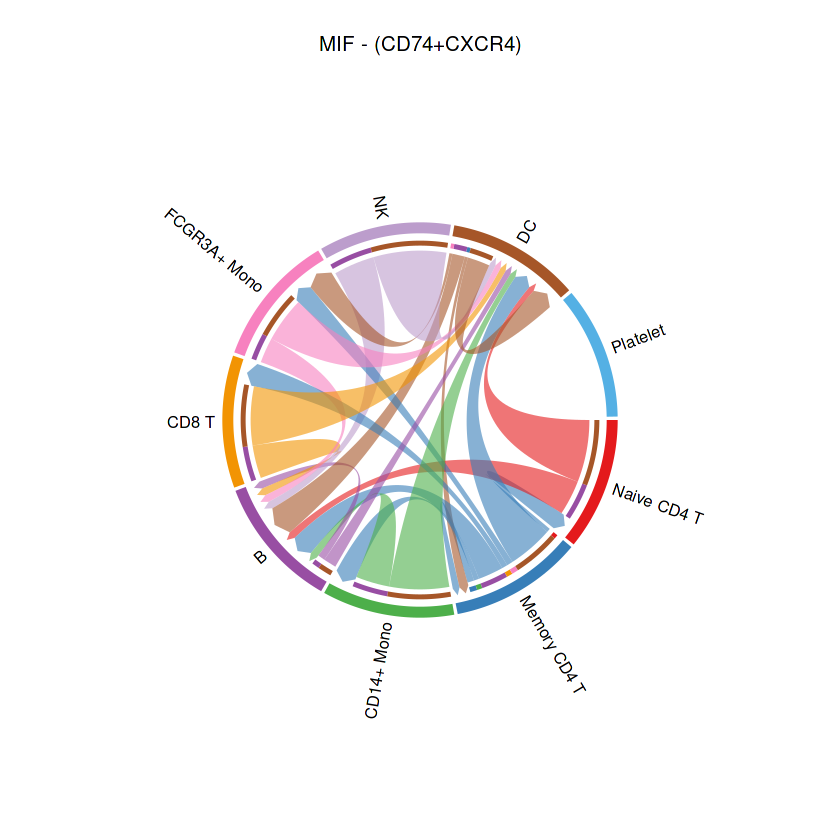

In [60]:
# Chord diagram
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = "MIF_CD74_CXCR4", layout = "chord")

## Step10.自动保存所有推断网络，方便用户快速探索

在实际使用中，用户可以使用for循环来自动保存所有推测的网络，以便使用netVisual进行快速探索。netVisual支持svg、png和pdf格式的输出，这里包括了两种可视化方法，一个是hierarchy plot，另一个是柱状图，见gg.plot的输出结果：

作者给的netVisual函数会在当前目录下生成N个配受体对的hierarchy图，居然没有给一个output的目录，因此我这里修改了作者的源代码，加了一个out.dir参数用于将png图片输出至指定的目录下。

此外，cellchat还有大量的函数存在一定问题，我把这些函数一一做了debug，加载自编函数:

In [26]:
source("../custom_seurat_functions.R")

In [28]:
cellchat@netP$pathways

[1] "COLLAGEN"    "APP"         "THBS"        "LAMININ"     "FN1"        
 [6] "ICAM"        "CCL"         "COMPLEMENT"  "GALECTIN"    "ANNEXIN"    
[11] "JAM"         "ITGAL-ITGB2" "CDH5"        "PECAM1"      "SEMA3"      
[16] "MIF"         "ESAM"        "VEGF"        "CXCL"        "TENASCIN"   
[21] "CSF"         "RESISTIN"    "TNF"         "PTPRM"       "SPP1"       
[26] "PARs"        "SEMA6"       "UGRP1"       "KIT"         "SEMA4"      
[31] "ADIPONECTIN" "TGFb"        "OSM"         "CD80"        "SEMA7"      
[36] "VISFATIN"    "BST2"        "EPHB"        "GAS"         "CSF3"       
[41] "GRN"         "NOTCH"       "HSPG"        "CADM"        "AGRN"       
[46] "CD39"        "WNT"         "FGF"         "LAIR1"       "BMP"        
[51] "PROS"        "TWEAK"       "VWF"         "EPHA"        "EDN"        
[56] "NECTIN"

In [ ]:
# Access all the signaling pathways showing significant communications
pathways.show.all <- cellchat@netP$pathways
# check the order of cell identity to set suitable vertex.receiver
levels(cellchat@idents)
vertex.receiver = seq(1,4)
# Vis
gg.list = list()
for (i in 1:length(pathways.show.all)) {
  ## 可视化1：hierarchy plot 可视化配受体对 netVisual.V2是在作者的netVisual基础上补充了out.dir参数
  # Visualize communication network associated with both signaling pathway and individual L-R pairs
  netVisual.V2(cellchat, signaling = pathways.show.all[i],out.format = c("png"),
            vertex.receiver = vertex.receiver, layout = "hierarchy",out.dir = "./Outdata/NetVisual/")
    
  ## 可视化2： 柱状图可视化配受体对 
  # Compute and visualize the contribution of each ligand-receptor pair to the overall signaling pathway
  gg <- netAnalysis_contribution(cellchat, signaling = pathways.show.all[i])
  gg.list[[pathways.show.all[i]]] = gg
  #ggsave(filename=paste0(pathways.show.all[i], "_L-R_contribution.pdf"), plot=gg, width = 3, height = 2, units = 'in', dpi = 300)
}

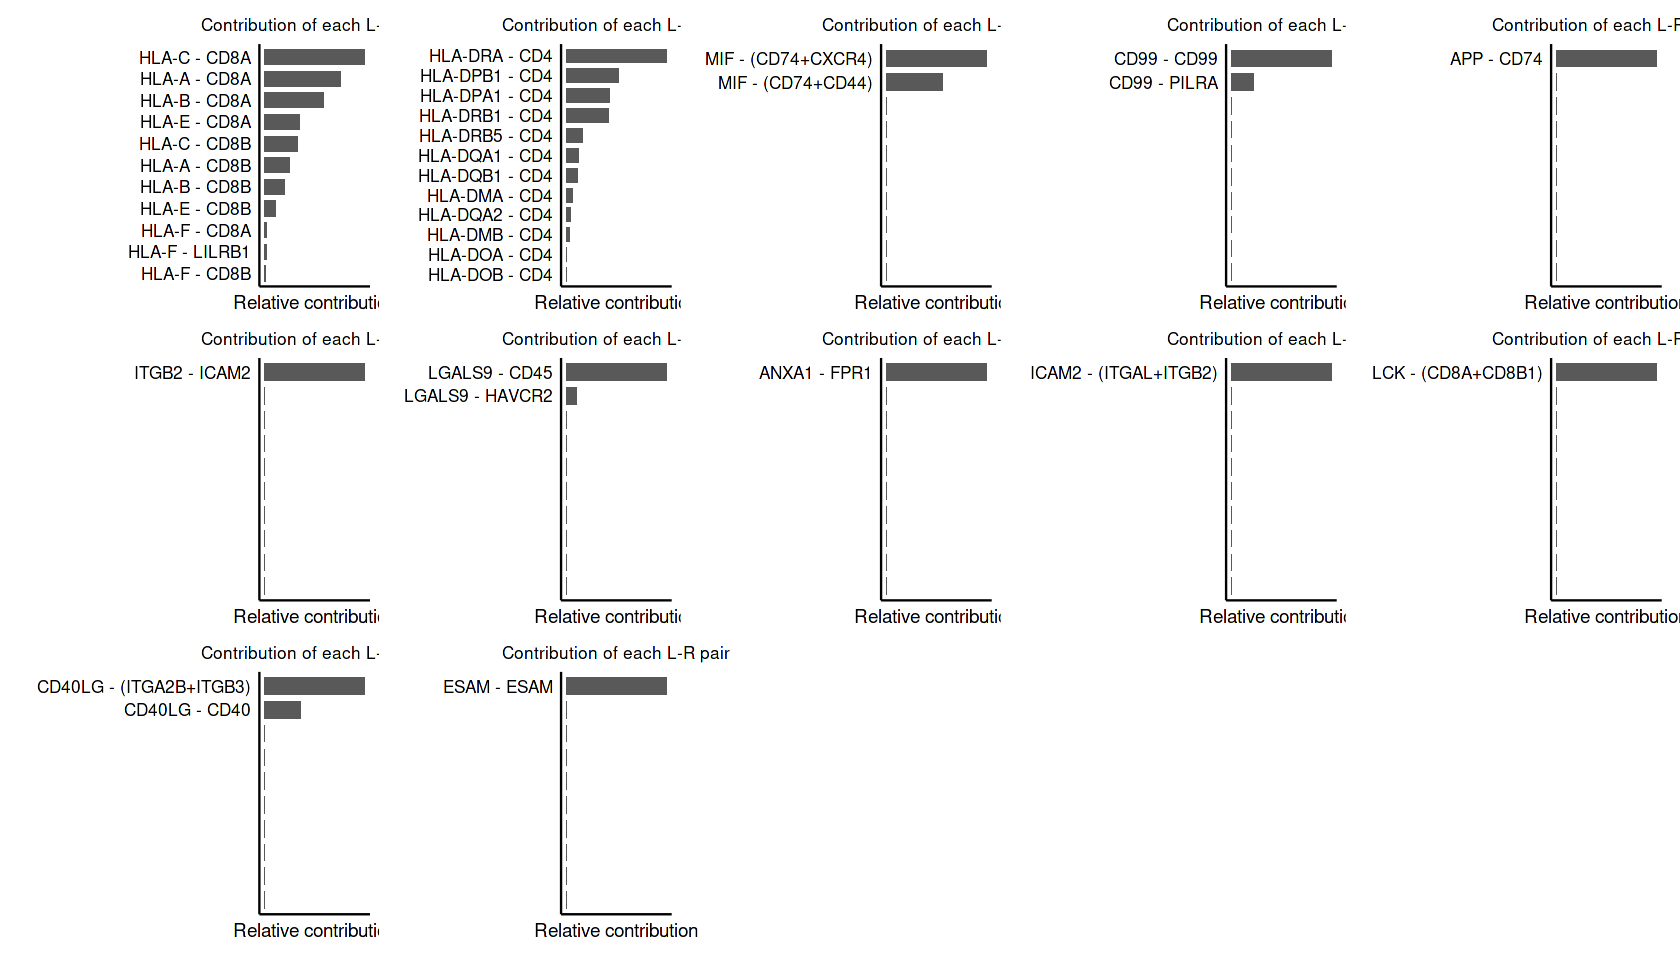

In [73]:
options(repr.plot.width = 14, repr.plot.height = 8)
gg.plot = wrap_plots(gg.list,ncol = 5)
gg.plot

In [74]:
ggsave(gg.plot,filename = "./Outdata/Step2.L_R_contribution.pdf",width = 14, height = 10)

## Step11. 观察多种配体受体或信号通路介导的细胞-

主要有气泡图、和弦图和小提琴图三种可视化方式：

### 11.1 气泡图

展示指定sources.use和targets.use的所有的配受体信息

Comparing communications on a single object 




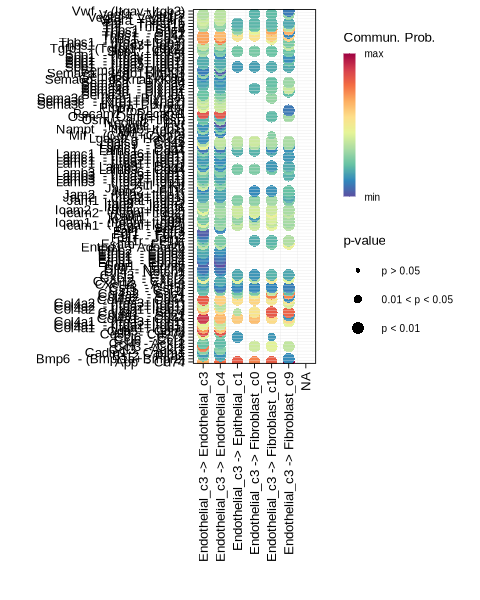

In [32]:
### Bubble plot
# show all the significant interactions (L-R pairs) from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
options(repr.plot.width = 4, repr.plot.height = 5)
netVisual_bubble(cellchat, sources.use = 1, targets.use = c(1:7), remove.isolate = FALSE)

展示指定sources.use和targets.use的指定的pathway下的配受体信息，signaling参数

Comparing communications on a single object 




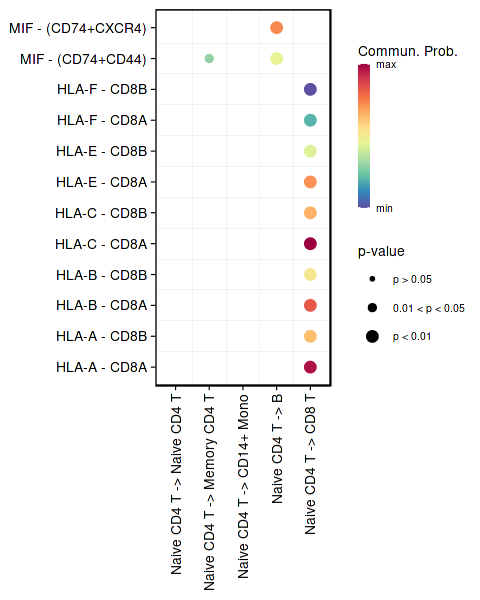

In [80]:
# show all the significant interactions (L-R pairs) associated with certain signaling pathways
netVisual_bubble(cellchat, sources.use = 1, targets.use = c(1:5), 
                 signaling = c("MIF","MHC-I"), remove.isolate = FALSE)

In [ ]:
展示指定sources.use和targets.use的指定的配受体信息，pairLR.use参数

Comparing communications on a single object 




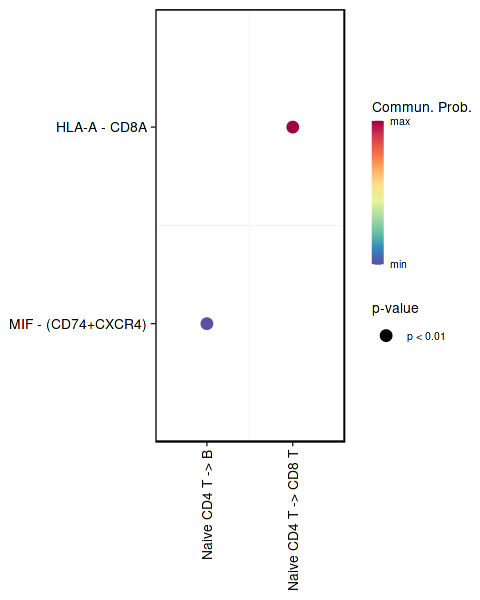

In [82]:
# show all the significant interactions (L-R pairs) based on user's input (defined by `pairLR.use`)
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("MIF","MHC-I"))
pairLR.use  = pairLR.use[c(1,3),,drop=F]
netVisual_bubble(cellchat, sources.use = c(1), targets.use = c(1:5), 
                 pairLR.use = pairLR.use, remove.isolate = TRUE)

### 11.2 和弦图

同样的，基于netVisual_chord_gene函数，也可以用和弦图进行可视化：

展示从一些细胞群到其他细胞群的所有相互作用（受配体对或pathway)。两种特殊情况：一种是展示从一个细胞亚群发送的所有相互作用，另一种是显示由一个一个细胞亚群接收的所有相互作用；
展示用户自定义的某些信号通路。
如下：

第一种情况，展示所有的指定的细胞亚群之间的相互作用通路：

例如native CD4T接受其他细胞的信号

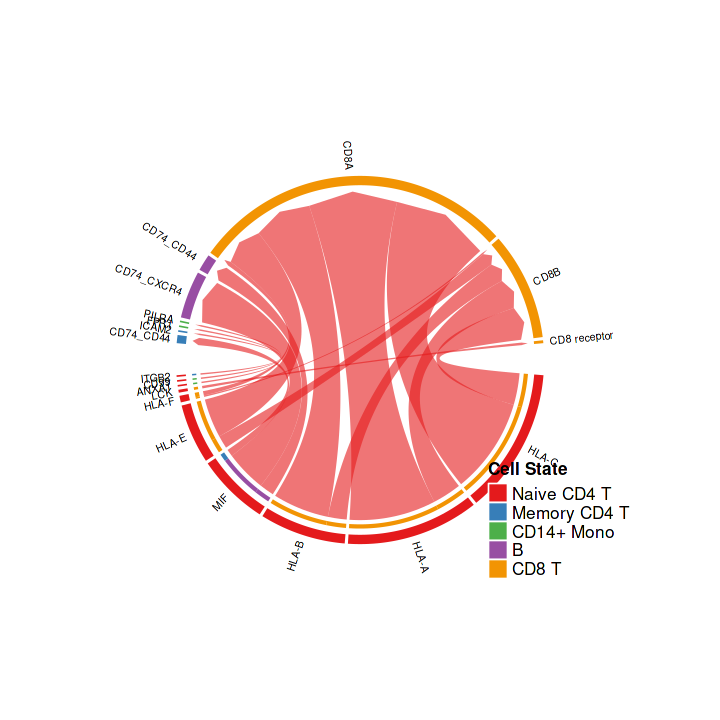

In [86]:
# show all the significant interactions (L-R pairs) from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
# show all the interactions sending from native CD4T 
options(repr.plot.width = 6, repr.plot.height = 6)
netVisual_chord_gene(cellchat,
                     sources.use = 1,
                     targets.use = c(2:5),
                     lab.cex = 0.5,legend.pos.y = 30)

In [ ]:
或者native CD4T传到其他细胞的信号：

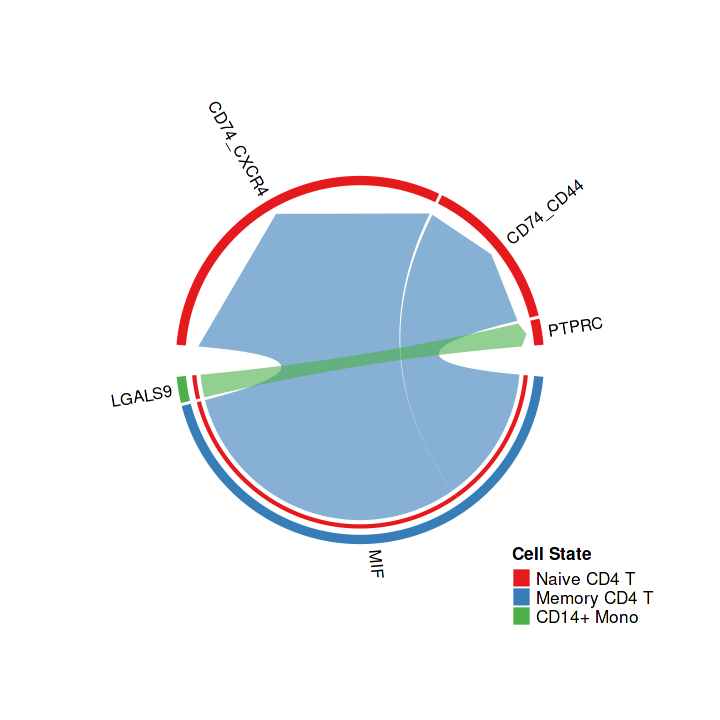

In [88]:
# show all the interactions received by native CD4T
netVisual_chord_gene(cellchat,
                     sources.use = c(2:5),
                     targets.use = 1,
                     legend.pos.x = 15)

用户也可以通过slot.name = "netP"显示所有的通路，或者在此基础上加signaling参数指定特定通路：

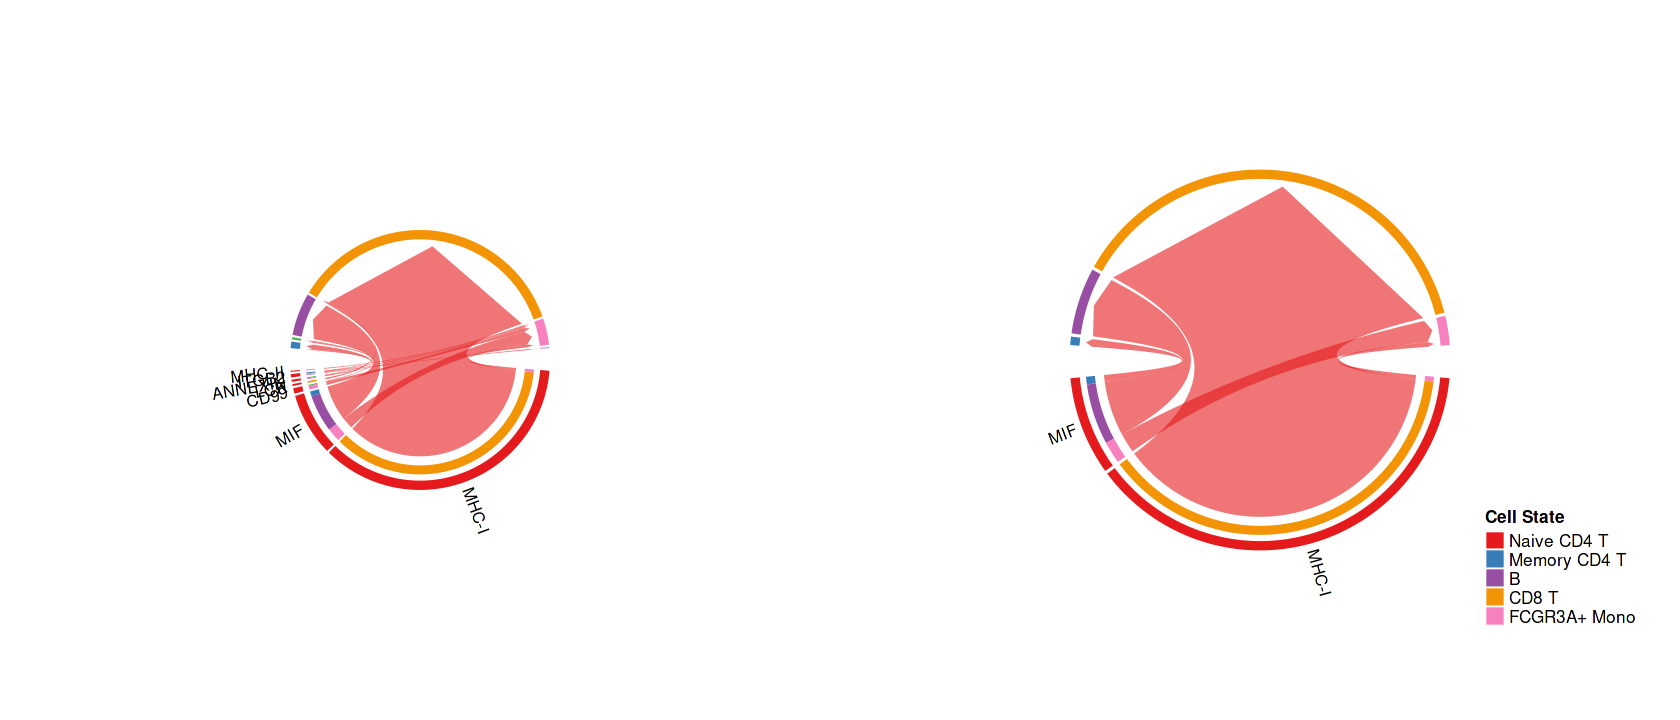

In [95]:
options(repr.plot.width = 14, repr.plot.height = 6)
par(mfrow=c(1,2))
# show all the significant signaling pathways from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
netVisual_chord_gene(cellchat,
                     sources.use = c(1),
                     targets.use = c(2:7),
                     slot.name = "netP", legend.pos.x = 10)

## 体会与上代码的区别？
netVisual_chord_gene(cellchat,
                     sources.use = c(1),
                     targets.use = c(2:7),
                     signaling = c("MIF","MHC-I"),
                     slot.name = "netP", legend.pos.x = 10)

用户也可以通过signaling指定需要展示的特定通路下的受配体对，以及用pairLR.use指定需要展示的受配体对：

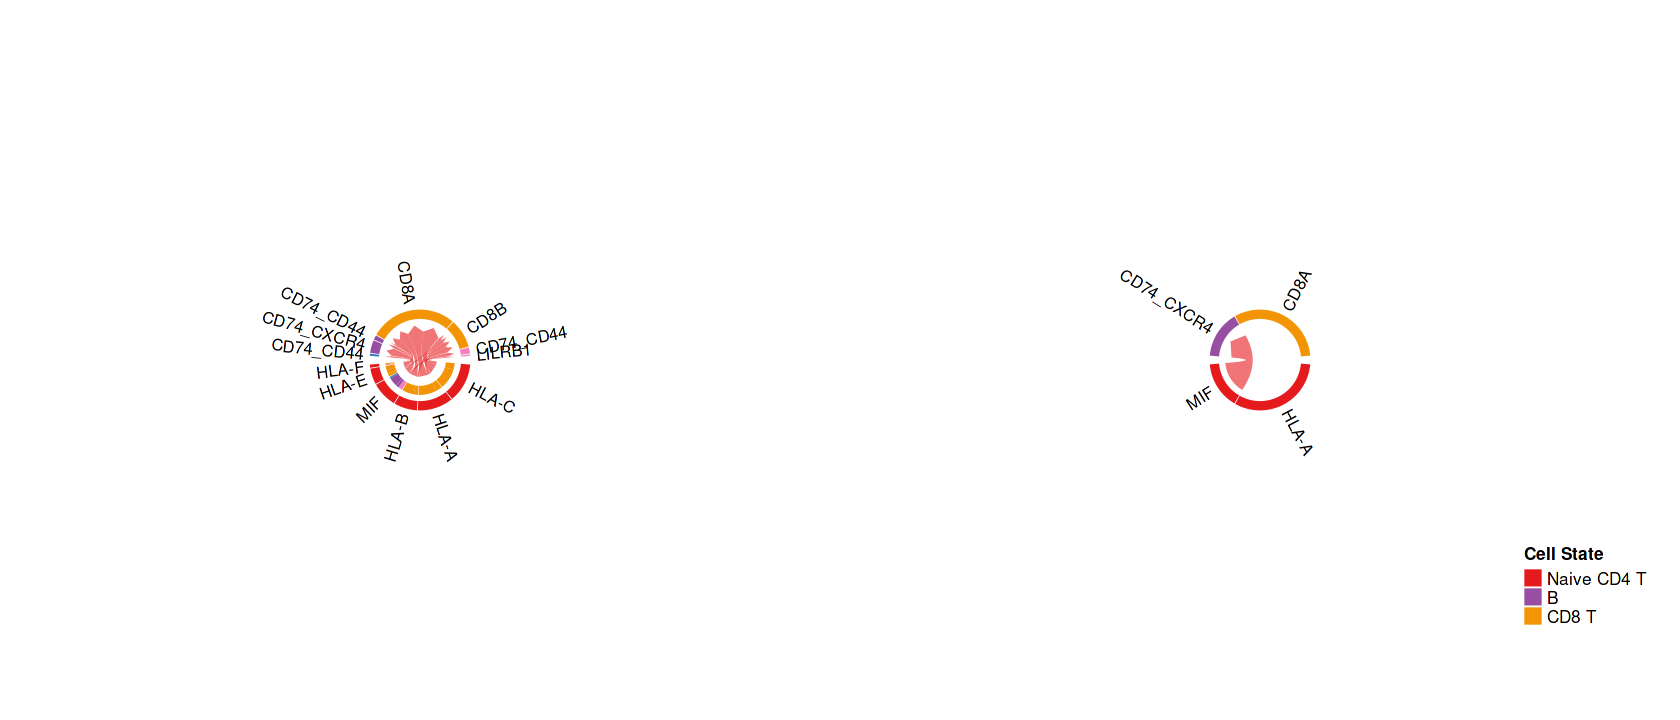

In [96]:
par(mfrow=c(1,2))
# show all the significant interactions (L-R pairs) associated with certain signaling pathways
netVisual_chord_gene(cellchat, sources.use = c(1),
                     targets.use = c(2:7),
                     signaling = c("MIF","MHC-I"),
                     legend.pos.x = 8)

# show specific interactions (L-R pairs) associated with certain signaling pathways
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("MIF","MHC-I"))
pairLR.use  = pairLR.use[c(1,3),,drop=F]
netVisual_chord_gene(cellchat, sources.use = c(1),
                     targets.use = c(2:7),
                     pairLR.use = pairLR.use,
                     # signaling = c("MIF","MHC-I"),
                     legend.pos.x = 8)

## Step12. 使用小提琴/气泡图绘制信号基因表达分布

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


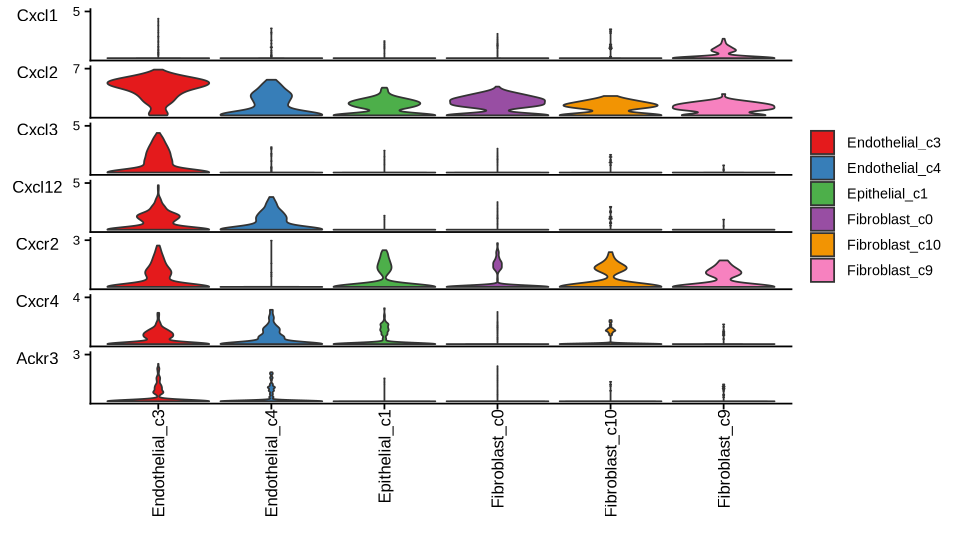

In [33]:
options(repr.plot.width = 8, repr.plot.height = 4.5)
plotGeneExpression(cellchat, signaling = "CXCL")

默认情况下，plotGeneExpression只显示与推测的显著的通讯相关的信号基因的表达。用户可以展示某通路下所有的受配体信号：

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


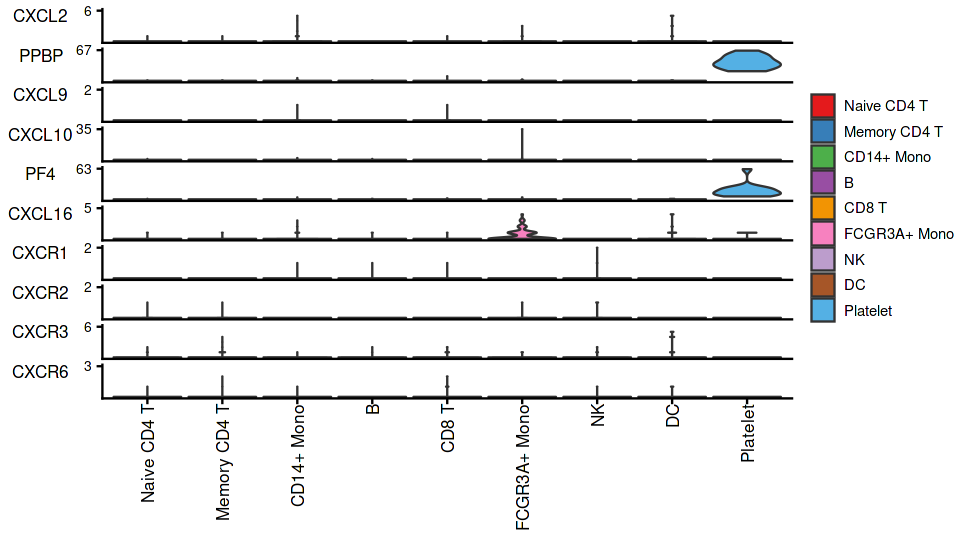

In [101]:
plotGeneExpression(cellchat, signaling = "CXCL", enriched.only = FALSE)

用户也可以使用extractEnrichedLR提取推测的受配体对或信号通路相关的信号基因，然后使用Seurat包绘制基因表达图。

# Part IV: 细胞-细胞通讯网络的系统分析

为了便于理解复杂的细胞间通讯网络，CellChat通过从图论、模式识别和空间信息流形学习中抽象出来的方法对网络进行定量测量：

CellChat可以确定主要的信号sources和targets，以及在给定的信号网络中使用来自网络分析的中心性度量的中介和影响者；
CellChat利用模式识别方法，可以预测特定细胞类型的关键输入和输出信号，以及不同细胞类型之间的协调反应，利用模式识别方法；
CellChat可以通过定义相似性度量和从功能和拓扑两方面执行多种学习来对信号通路进行分组；
CellChat可以通过多网络的联合流形学习来勾画出保守的和上下文相关的信号通路。

## Step13. 识别细胞亚群的信号作用（例如主要的发送者，接收者）以及主要的贡献信号

CellChat通过计算每个细胞组的若干网络中心性度量，可以随时识别细胞间通信网络中的主要的发送者（senders）、接收者（receivers）、中介（mediators）和影响者（influencers）。具体而言，作者使用加权定向网络中的指标，包括向外程度、向内程度、流动间度和信息中心性，分别识别细胞间通信的主导发送者、接收者、中介和影响者。在以权值为计算通信概率的加权有向网络中，小区组出方向信号的出度和入方向信号的入方向信号的出度分别用来识别信号网络中占主导地位的小区发送方和接收方。关于流间性和信息中心性的定义，请查阅作者的论文和相关参考资料。

### 13.1 计算并可视化网络中心性得分

netAnalysis_computeCentrality函数基于netP插槽，计算网络中心性得分，然后进行可视化：

[1] "COLLAGEN"    "APP"         "THBS"        "LAMININ"     "FN1"        
 [6] "ICAM"        "CCL"         "COMPLEMENT"  "GALECTIN"    "ANNEXIN"    
[11] "JAM"         "ITGAL-ITGB2" "CDH5"        "PECAM1"      "SEMA3"      
[16] "MIF"         "ESAM"        "VEGF"        "CXCL"        "TENASCIN"   
[21] "CSF"         "RESISTIN"    "TNF"         "PTPRM"       "SPP1"       
[26] "PARs"        "SEMA6"       "UGRP1"       "KIT"         "SEMA4"      
[31] "ADIPONECTIN" "TGFb"        "OSM"         "CD80"        "SEMA7"      
[36] "VISFATIN"    "BST2"        "EPHB"        "GAS"         "CSF3"       
[41] "GRN"         "NOTCH"       "HSPG"        "CADM"        "AGRN"       
[46] "CD39"        "WNT"         "FGF"         "LAIR1"       "BMP"        
[51] "PROS"        "TWEAK"       "VWF"         "EPHA"        "EDN"        
[56] "NECTIN"

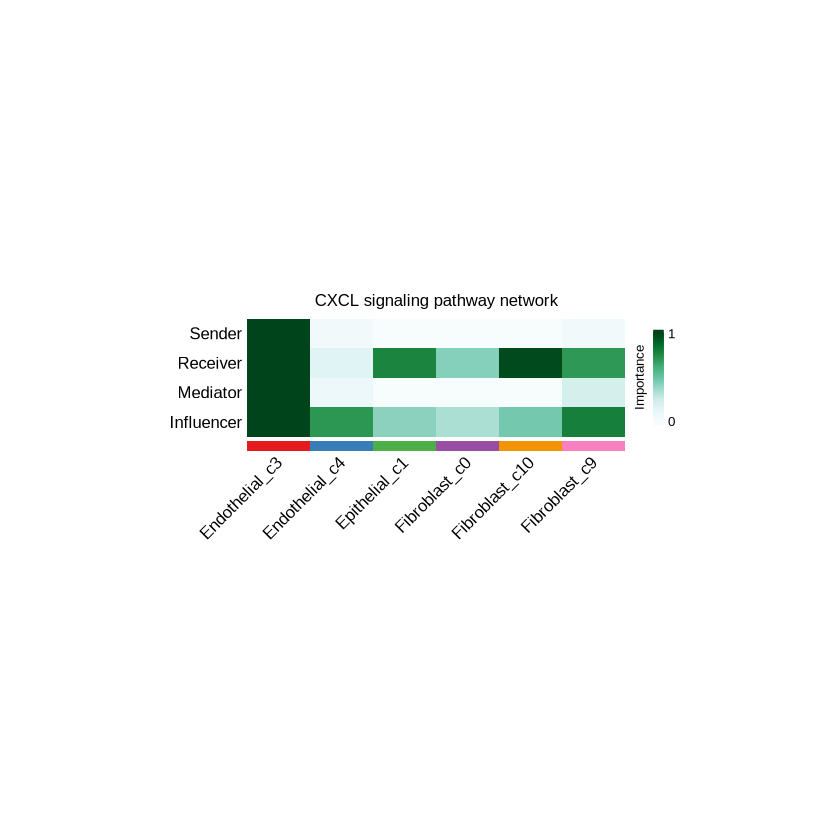

In [6]:
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
cellchat@netP$pathways
pathways.show = "CXCL"
netAnalysis_signalingRole_network(cellchat,
                                  signaling = pathways.show,
                                  width = 8, height = 2.5,
                                  font.size = 10)

### 13.2 在2D空间中可视化主要的发送者（source）和接收者（target）

作者还提供了另一种直观的方法，使用散点图在2D空间中可视化主要的发送方(source)和接收方(target)：

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the CellChat package.
  Please report the issue to the authors.”


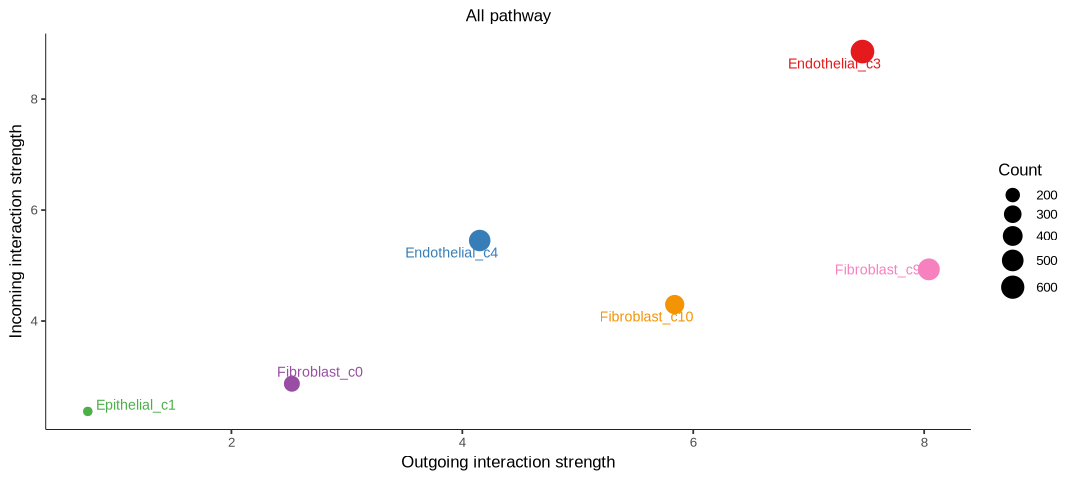

In [7]:
# Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
gg1 <- netAnalysis_signalingRole_scatter(cellchat)+ggtitle("All pathway")

options(repr.plot.width = 9, repr.plot.height = 4)
gg1

## 感兴趣的pathway
# Signaling role analysis on the cell-cell communication networks of interest
# gg2 <- netAnalysis_signalingRole_scatter(cellchat, signaling = c("MIF","MHC-I"))+ggtitle("MIF and MHC-I")

# options(repr.plot.width = 9, repr.plot.height = 4)
# gg1 + gg2

### 13.3 识别对某些细胞亚群的输出或输入信号中贡献最大的信号

In [3]:
library(ComplexHeatmap)


Loading required package: grid

ComplexHeatmap version 2.25.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [8]:
# Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
ht1 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing")
ht2 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming")



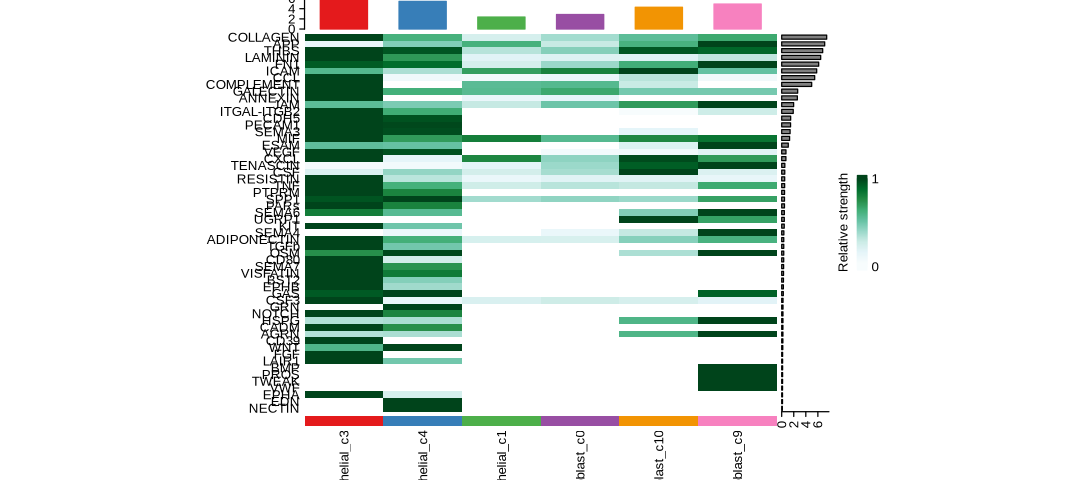

In [14]:
ht2

In [10]:
# 输出到 PDF，调整宽高（单位 inch）
pdf("ht1_outgoing.pdf", width = 6, height = 20)  
draw(ht1)
dev.off()

agg_record_16906800 
                  2

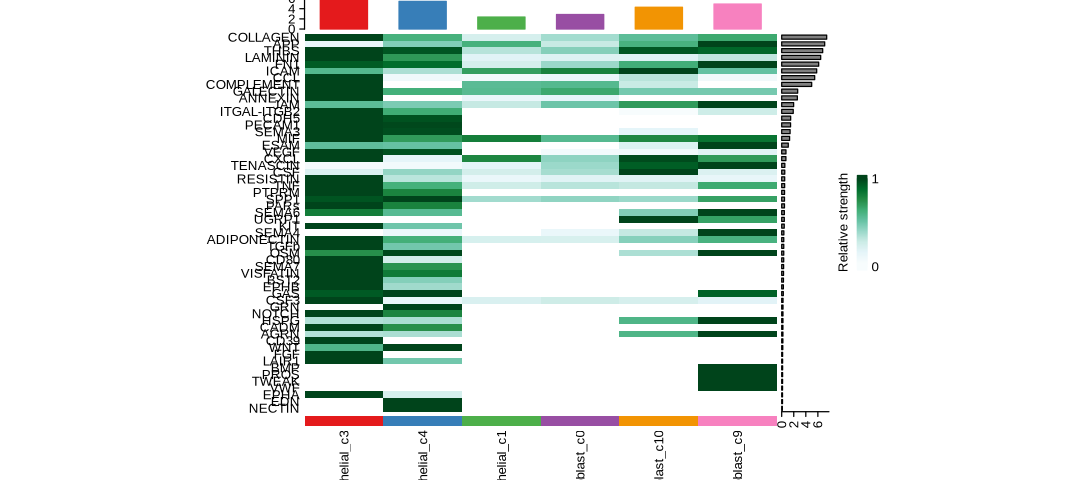

In [12]:
# 分开绘制
draw(ht2)


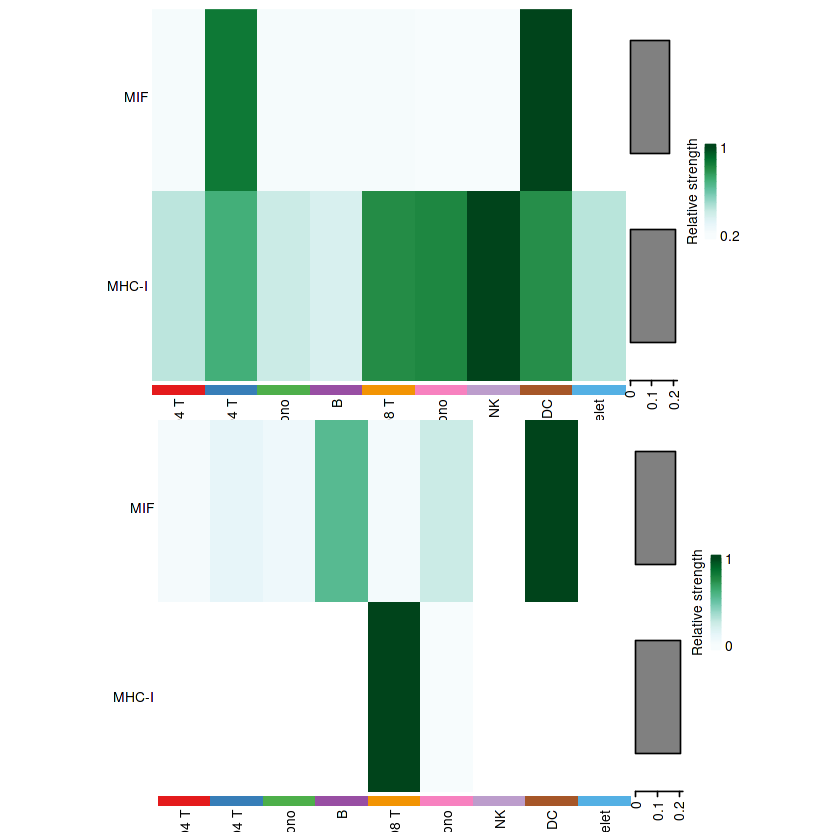

In [38]:
## 当然也支持可视化指定的pathway：
# Signaling role analysis on the cell-cell communication networks of interest
ht1 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing",signaling = c("MIF","MHC-I"))
ht2 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming",signaling = c("MIF","MHC-I"))
ht1+ht2

In [39]:
library(NMF)
library(ggalluvial)

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')


Attaching package: ‘NMF’


The following objects are masked from ‘package:igraph’:

    algorithm, compare




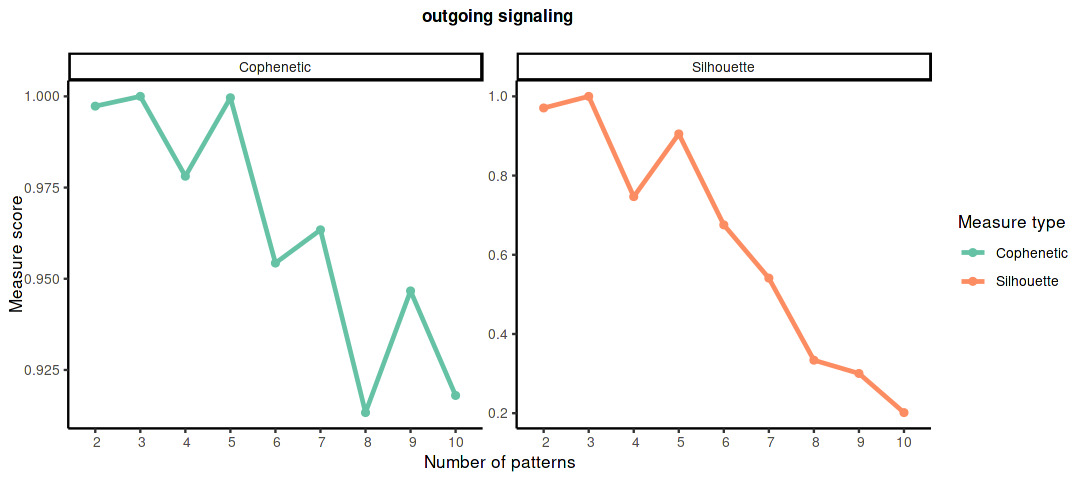

In [120]:
selectK(cellchat, pattern = "outgoing")

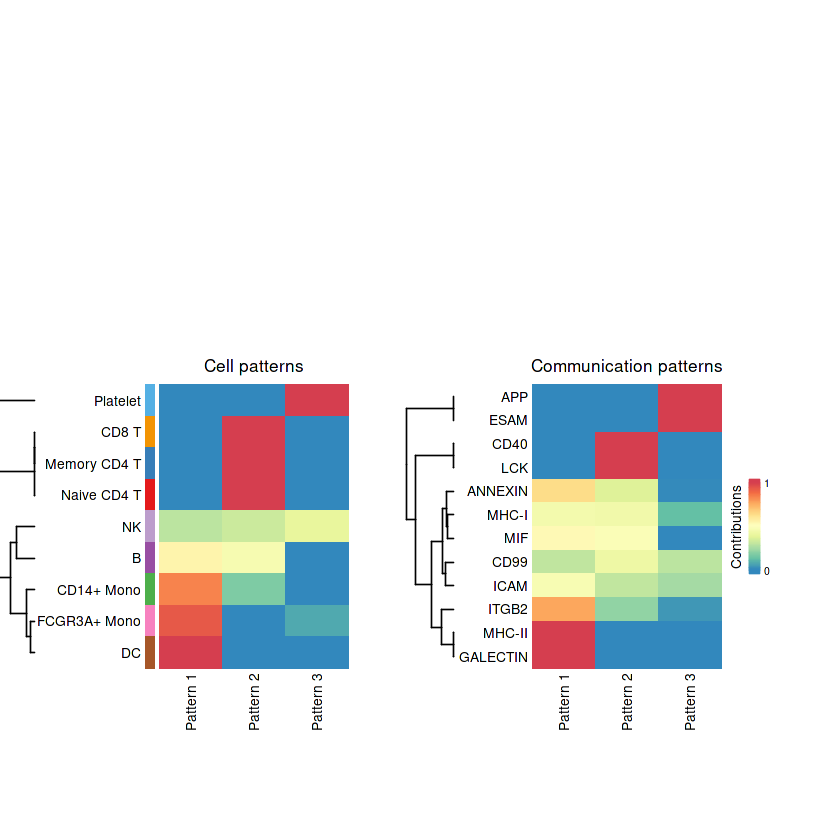

In [40]:
nPatterns = 3
cellchat <- identifyCommunicationPatterns(object = cellchat,
                                          pattern = "outgoing",
                                          k = nPatterns)

Please make sure you have load `library(ggalluvial)` when running this function



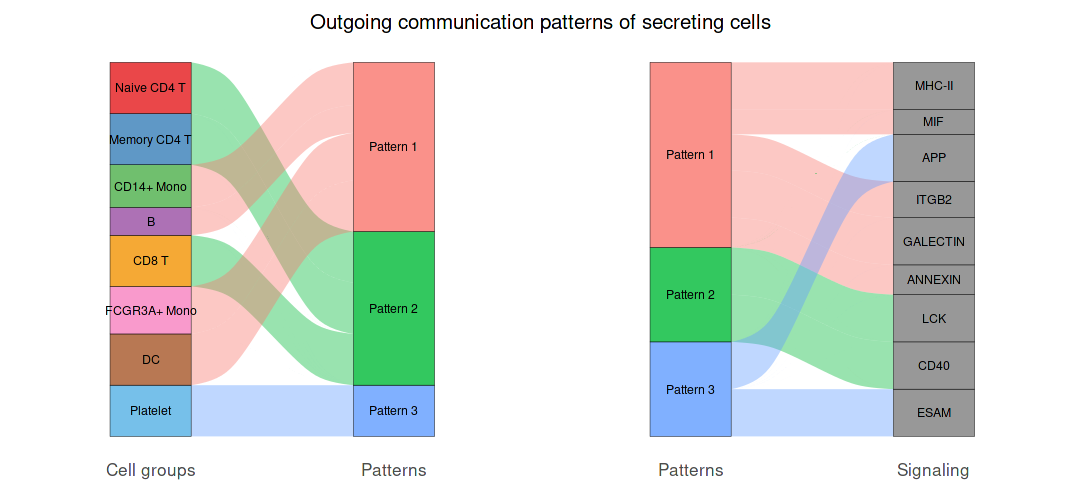

In [123]:
# river plot
netAnalysis_river(cellchat, pattern = "outgoing")# river plot

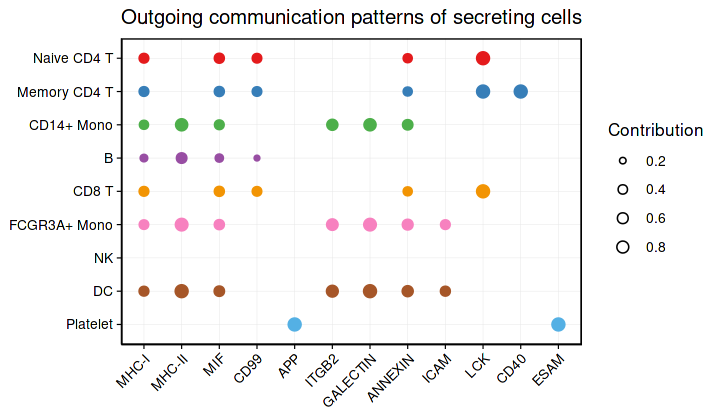

In [125]:
# dot plot
options(repr.plot.width = 6, repr.plot.height = 3.5)
netAnalysis_dot(cellchat, pattern = "outgoing")

## 14.2 识别并可视化目标单元的传入（incoming）通讯模式

传入（incoming）模式显示了目标细胞（即作为信号接收器的细胞）如何与其他细胞相互协调，以及它们如何与特定的信号通路协调以响应传入信号。
与outgoing模式一样的代码和可视化方法：

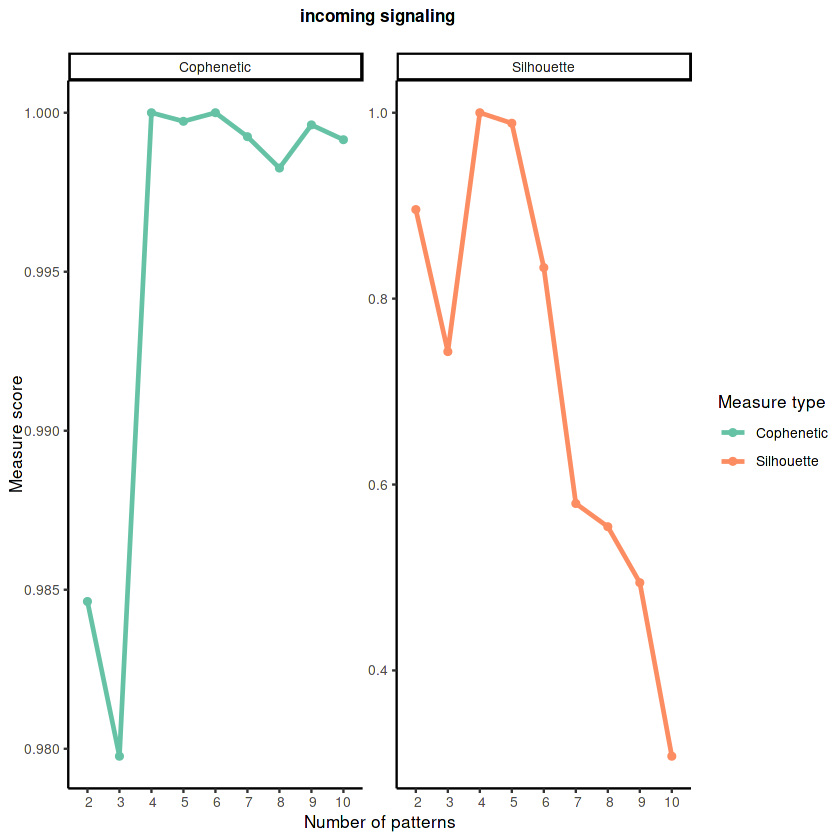

In [41]:
selectK(cellchat, pattern = "incoming")

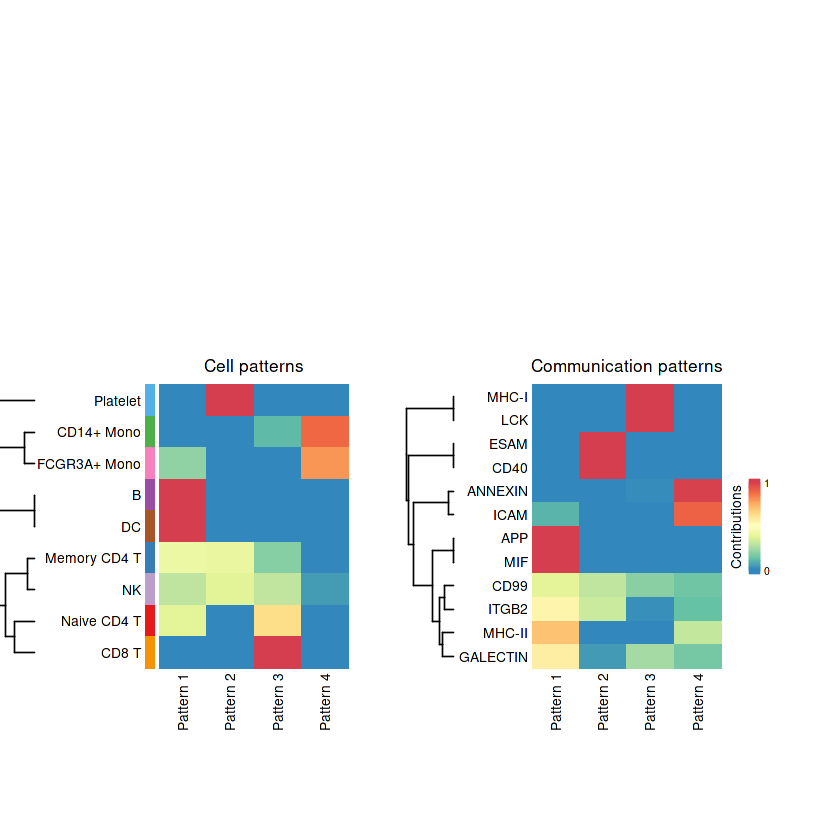

In [42]:
nPatterns = 4
cellchat <- identifyCommunicationPatterns(cellchat, pattern = "incoming", k = nPatterns)

Please make sure you have load `library(ggalluvial)` when running this function



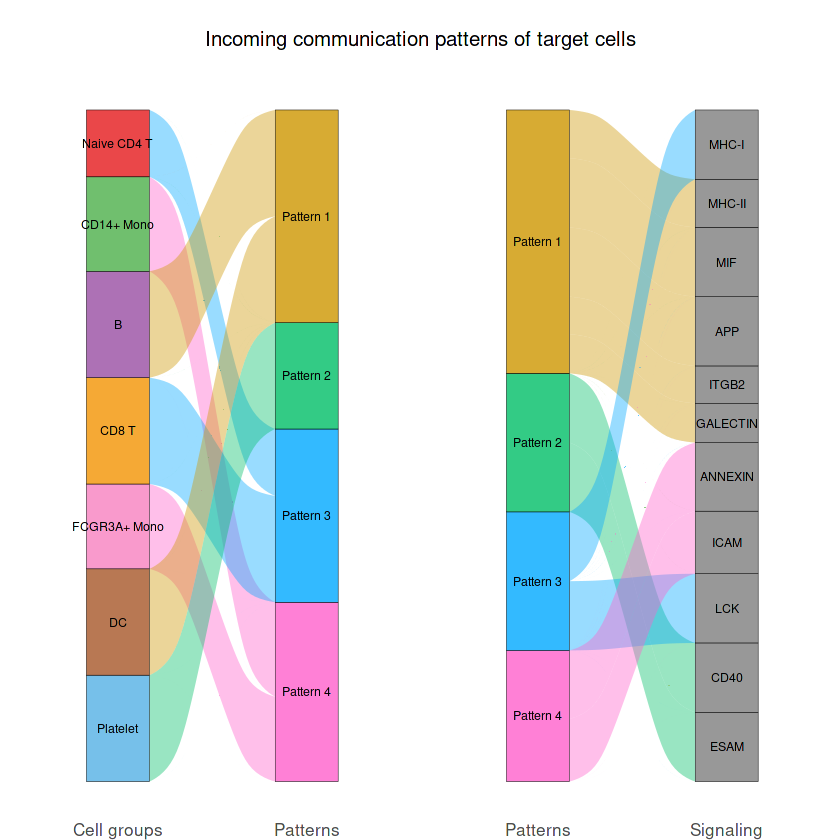

In [43]:
# river plot
netAnalysis_river(cellchat, pattern = "incoming")
#> Please make sure you have load `library(ggalluvial)` when running this function

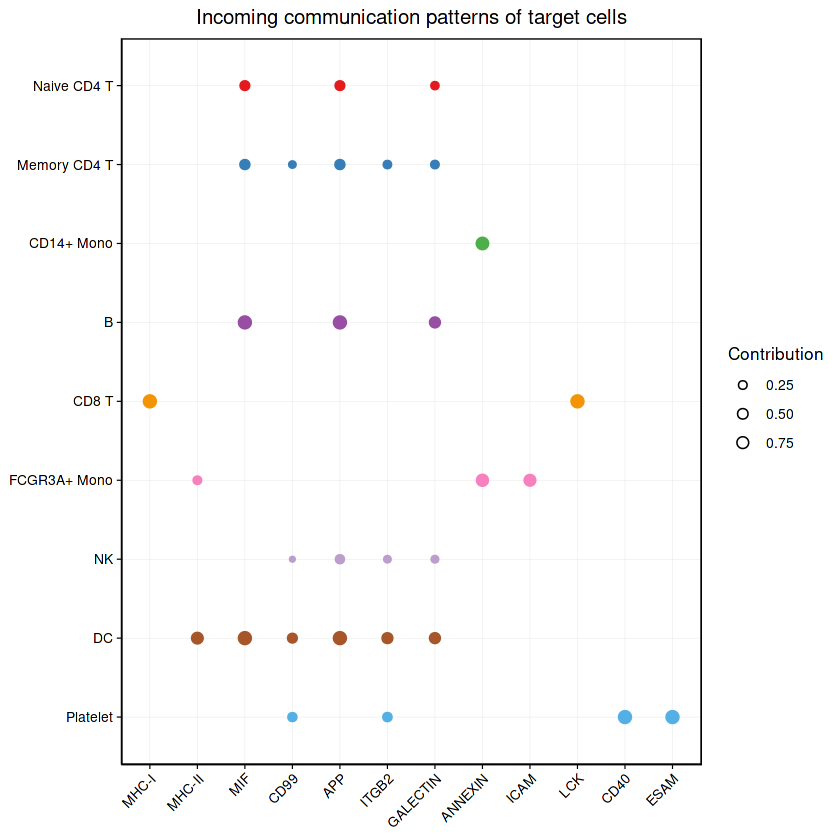

In [44]:
# dot plot
netAnalysis_dot(cellchat, pattern = "incoming")

## Step15. 信号网络的流形分类学习分析

此外，CellChat能够量化所有重要信号通路之间的相似性，然后根据它们的细胞内通信网络相似性对它们进行分组。可以根据功能或结构相似性进行分组。
功能相似:功能相似程度高表明主要的发送者和接收者相似，可以解释为两个信号通路或两个配体-受体对表现出相似和/或冗余的作用。功能相似性分析要求两个数据集之间具有相同的细胞种群组成。
结构相似性:采用结构相似性比较两家信令网络结构，不考虑发送方和接收方的相似性。

根据功能相似性确定信号组：

In [14]:
cellchat <- computeNetSimilarity(cellchat, type = "functional")
cellchat <- netEmbedding(cellchat, type = "functional")

Manifold learning of the signaling networks for a single dataset 


Classification learning of the signaling networks for a single dataset 


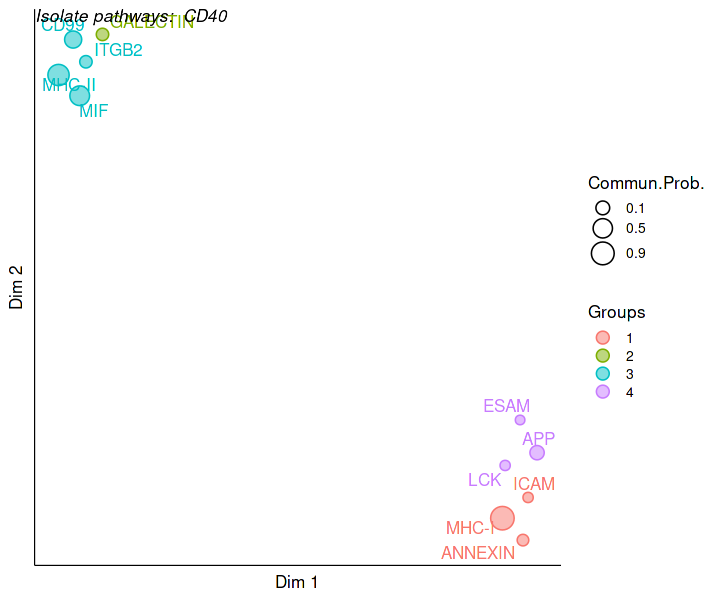

In [15]:
#> Manifold learning of the signaling networks for a single dataset
cellchat <- netClustering_GitHub(cellchat, type = "functional",do.parallel = F)
#> Classification learning of the signaling networks for a single dataset
# Visualization in 2D-space
options(repr.plot.width = 6, repr.plot.height = 5)
netVisual_embedding(cellchat, type = "functional", label.size = 3.5)

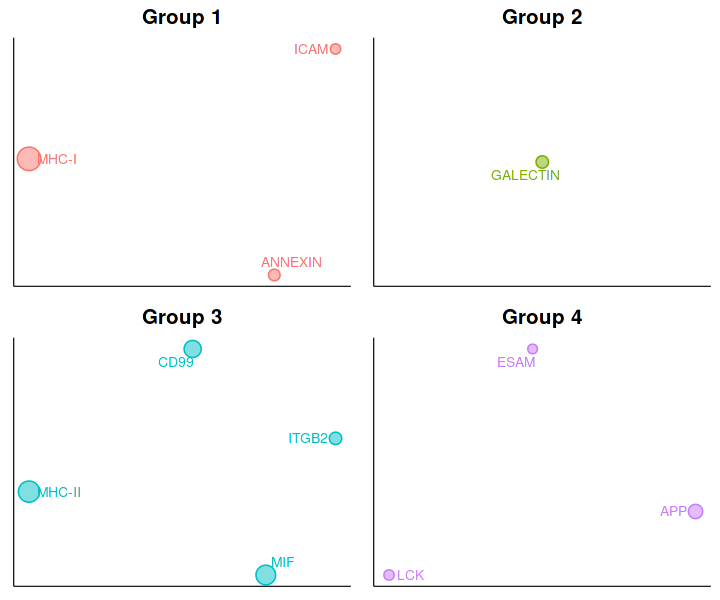

In [16]:
netVisual_embeddingZoomIn(cellchat, type = "functional", nCol = 2)

根据结构相似性确定信号组:

In [10]:
cellchat <- computeNetSimilarity(cellchat, type = "structural")

Manifold learning of the signaling networks for a single dataset 
Classification learning of the signaling networks for a single dataset 


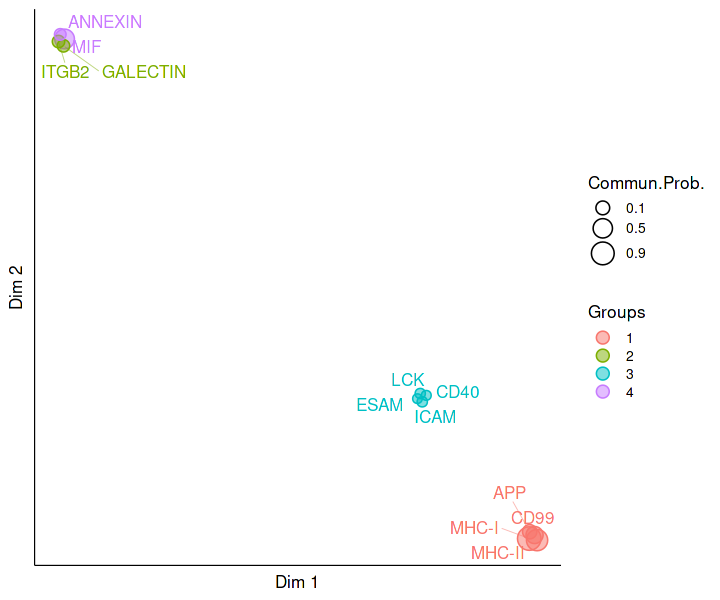

In [12]:
cellchat <- netEmbedding(cellchat, type = "structural")
#> Manifold learning of the signaling networks for a single dataset
cellchat <- netClustering(cellchat, type = "structural",do.parallel = F)
#> Classification learning of the signaling networks for a single dataset
# Visualization in 2D-space
netVisual_embedding(cellchat, type = "structural", label.size = 3.5)

以上就是CellChat包的可视化展示及解读的全部内容。上文的分析和可视化完全是基于没有分组的情况下，例如乳腺癌的单细胞通讯图谱，并不涉及多组间的比较，例如免疫治疗前中后的通讯比较分析。因此，在此基础上，作者还开发了一套代码和函数，方便用户进行多组间比较分析，我们下期再聊。

In [ ]:
### End